In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
vid_name = "03/0"
rank = 0
video = cv2.VideoCapture(vid_name + ".MOV")
_, frame = video.read()

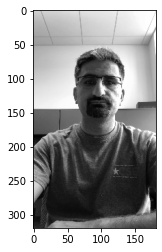

In [3]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
resize_crop = cv2.resize(gray, (180, 320))
plt.imshow(resize_crop, cmap="gray")

In [4]:
face_cascade = cv2.CascadeClassifier()
face_cascade.load("haarcascade_frontalface_default.xml")

True

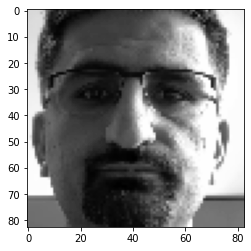

In [5]:
faces = face_cascade.detectMultiScale(resize_crop)[0]
face_crop = resize_crop[faces[1]:faces[1]+faces[3], faces[0]:faces[0]+faces[2]]
plt.imshow(face_crop, cmap="gray")

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [7]:
resize_crop = resize_crop.flatten()
scaled = scaler.fit_transform(resize_crop.reshape(-1, 1))
scaled = np.append(np.array([rank]), scaled).reshape(1, -1)
scaled

array([[0.        , 0.80952381, 0.81349206, ..., 0.26984127, 0.27380952,
        0.28571429]])

In [8]:
global df
df = pd.DataFrame()

In [9]:
def get_frame(sec):
    video.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    success, image = video.read()
    return success, image

In [10]:
def get_data(sec):
    global df
    success, image  = get_frame(sec)
    if not success:
        return
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (90, 160))
    scaled = scaler.fit_transform(resized).flatten()
    out = np.append(np.array([rank]), scaled).flatten()
    df = df.append(pd.Series(out), ignore_index=True)

In [24]:
def get_face(sec):
    global df
    success, image  = get_frame(sec)
    if not success:
        return
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (gray.shape[1]//2, gray.shape[0]//2))
    face_loc = face_cascade.detectMultiScale(resized, minSize=(100, 100))
    if len(face_loc) == 0:
        print("didnt find")
        return
    face_loc = sorted(face_loc, key=lambda x:x[2], reverse=True)
    face_crop = resized[face_loc[0][1]:face_loc[0][1]+face_loc[0][3], face_loc[0][0]:face_loc[0][0]+face_loc[0][2]]
    face_crop = cv2.resize(face_crop, (50, 50))
    scaled = scaler.fit_transform(face_crop).flatten()
    out = np.append(np.array([rank]), scaled).flatten()
    plt.imshow(face_crop, cmap="gray")
    df = df.append(pd.Series(out), ignore_index=True)

In [28]:
for p in ["01", "02", "03", "04", "05", "06"]:
    for r in [0, 5, 10]:
        vid_name = p + "/" + str(r)
        rank = r
        video = cv2.VideoCapture(vid_name + ".MOV")
        success, _ = video.read()
        if not success:
            video = cv2.VideoCapture(vid_name + ".mp4")
        
        start = time.time()
        df = pd.DataFrame()
        for i in range(0, 600, 10):
            elapsed = time.time() - start
            done = (i+1)/600
            estimate = int(elapsed/done - elapsed)
            print(f"Currently at {i//60} minutes and {i%60} seconds -- Estimated {estimate}s left on {vid_name}        ", end="\r")

            get_data(i)

        df.to_csv("data/" + p + "-" + str(r) + ".csv", header=False, index=False)

didnt findat 3 minutes and 30 seconds -- Estimated 6s left on 01/10        
didnt findat 6 minutes and 30 seconds -- Estimated 0s left on 04/0         
didnt findat 7 minutes and 0 seconds -- Estimated 1s left on 04/5         
didnt findat 8 minutes and 30 seconds -- Estimated 0s left on 04/5        
didnt findat 0 minutes and 30 seconds -- Estimated 1s left on 05/5         
didnt findat 3 minutes and 30 seconds -- Estimated 1s left on 05/5        
didnt findat 4 minutes and 0 seconds -- Estimated 1s left on 05/5        
didnt findat 4 minutes and 30 seconds -- Estimated 1s left on 05/5        
didnt findat 6 minutes and 0 seconds -- Estimated 1s left on 05/5         
didnt findat 2 minutes and 0 seconds -- Estimated 1s left on 05/10         


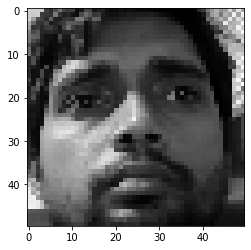

In [25]:
for p in ["01", "02", "03", "04", "05", "06"]:
    for r in [0, 5, 10]:
        vid_name = p + "/" + str(r)
        rank = r
        video = cv2.VideoCapture(vid_name + ".MOV")
        success, _ = video.read()
        if not success:
            video = cv2.VideoCapture(vid_name + ".mp4")
        
        start = time.time()
        df = pd.DataFrame()
        for i in range(0, 600, 30):
            elapsed = time.time() - start
            done = (i+1)/600
            estimate = int(elapsed/done - elapsed)
            print(f"Currently at {i//60} minutes and {i%60} seconds -- Estimated {estimate}s left on {vid_name}        ", end="\r")

            get_face(i)

        df.to_csv("face data/" + p + "-" + str(r) + ".csv", header=False, index=False)